In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import sys
import os
from scipy import stats
import math
from scipy.optimize import curve_fit
from scipy.stats import norm
import seaborn as sns
import pandas as pd
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [3]:
def print_help():
    print("usage : folder_path, window size (1 for 10, 2 for 20, ....)")

In [4]:
'''Windowed mean square displacement'''
'''Input : dataFrame (num_robot x stored times), window size'''
'''Output : average wmsd for all the robot at each timestep'''
def window_displacement(df, window_size):
    # print(df.shape[1])
    w_displacement_matrix = np.array([])
    for f in range(window_size, df.shape[1]):
        xf = df[:,f]
        xi = df[:,f-window_size]
        sq_distance = np.sum((xf-xi)**2, axis=1)
        wmsd = np.true_divide(sq_distance, window_size**2)     #wmsd for the single robots
        w_displacement_matrix = np.column_stack([w_displacement_matrix, wmsd]) if w_displacement_matrix.size else wmsd
#         print(f-window_size, f)
    w_displacement_array = np.mean(w_displacement_matrix, axis=0)
    return(w_displacement_array)

In [5]:
'''Fixed window mean square displacement'''
'''Input : dataFrame (num_robot x stored times), window size'''
'''Output : average fixed wmsd for all the robot at each timestep'''
def fixed_window_displacement(df, window_size):
    w_displacement_matrix = np.array([])
    
    for f in range(window_size, df.shape[1], window_size):
        tf = df[:,f]
        ti = df[:,f-window_size]
        sq_distance = np.sum((tf-ti)**2, axis=1)
        wmsd = np.true_divide(sq_distance, window_size**2)
        w_displacement_matrix = np.column_stack([w_displacement_matrix, wmsd]) if w_displacement_matrix.size else wmsd
    #     print(f-w, f)

    w_displacement_array = np.mean(w_displacement_matrix, axis=0)
    return(w_displacement_array)
#     wmsd = np.mean(w_displacement_array)

In [6]:
def plot_heatmap(dictionary, w_size):
    for key, value in dictionary.items():
        fig=plt.figure(figsize = (12, 8))
        dataFrame=pd.DataFrame.from_dict(value)
        reversed_df=dataFrame.iloc[::-1]
        ax=sns.heatmap(reversed_df, annot = True, fmt = ".2e", vmin=0.0001, vmax=0.01)
        ax.set_title("Heatmap of WMSD for %s robots, w_size:%s" % (key, w_size))
        ax.set_ylabel("alpha")
        ax.set_xlabel("rho")
#         plt.show();
        #Salva su file
        file_name="WMSD_%s_robots_wsize_%s_heatmap.png" % (key, w_size)
        plt.savefig(results_dir+'/'+file_name)
        plt.close(fig)
    #     reversed_df.to_pickle(file_name[:-4] + ".pickle")

In [7]:
def plot_time_wmsd_temp(w_displacement_array, single_experiments, w_size, rho, alpha):
    times = np.arange(w_displacement_array.size)*10#*w_size scommentare solo per fixed wmsd
#     print("times.shape", times.shape)
#     print("single_experiments.shape", single_experiments.shape)
    fig=plt.figure(figsize=(20, 10), dpi= 160, facecolor='w', edgecolor='k')
#     for y in single_experiments:
#         plt.plot(times, y, "-o", linestyle='--')
    plt.plot(times, w_displacement_array, linewidth=3.0, marker='o')
    plt.title("WMSD in time, with " + r"$\bf{\rho}:$"+rho+" and " + r"$\bf{\alpha}:$"+alpha)
    plt.ylabel('w_displacement with window_size: %s' % w_size)
    plt.xlabel('time(s)')
    plt.ylim((0, 0.01))
    plt.grid()
#     plt.show();
    fileName = "wsize=%s_rho_%s_alpha_%s.png" %(w_size, rho, alpha)
    plt.savefig(result_time+'/'+fileName)
    plt.close(fig)

In [28]:
def plot_total_experiment_wmsd(total_wmsd_matrix, alpha, rho, w_size):
    fig=plt.figure(figsize=(20, 10), dpi= 160, facecolor='w', edgecolor='k')
    for i,y in enumerate(total_experiment_wmsd):
        if(windowed):
            times = np.arange(len(y))*10
        else:
            times = np.arange(len(y))*(i+1)*10
        
#         print("Times:", times)
#         print("WMSD:", y)
        plt.plot(times, y, label=i+1, marker='o')
#         print(i+1)
    plt.title("WMSD with different w_size, with " + r"$\bf{\rho}:$"+rho+" and " + r"$\bf{\alpha}:$"+alpha)
    plt.ylabel('WMSD')
    plt.xlabel('time(s)')
    plt.legend(loc='lower right')
#     plt.xticks(np.arange(0, 900, 10))
#     plt.grid(which='minor')
    plt.grid()
    plt.ylim((0,0.01))
    
#     ax = plt.axes()
# #     plt.setp(ax.get_xticklabels(),visible=False)
#     # Make a plot with major ticks that are multiples of 20 and minor ticks that
#     # are multiples of 5.  Label major ticks with '%d' formatting but don't label
#     # minor ticks.
#     ax.xaxis.set_major_locator(MultipleLocator(100))
#     ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

#     # For the minor ticks, use no labels; default NullFormatter.
#     ax.xaxis.set_minor_locator(MultipleLocator(10))
#     ax.yaxis.set_minor_locator(AutoMinorLocator(2))
#     ax.yaxis.set_major_formatter(FormatStrFormatter('%f'))
    
    
#     plt.show();
    fileName = "different_wSize_rho_%s_alpha_%s.png" %(rho, alpha)
    plt.savefig(result_time+'/'+fileName)
    plt.close(fig)
    
    
#     plt.setp(ax2.get_xticklabels(), visible=False)
#     frame1 = plt.gca()
#     frame1.axes.label.#().set_visible(False)

In [30]:
# def main():
windowed = True

from datetime import date
today = date.today()

'''Generate folder to store plots and heatmaps'''
script_dir = os.path.abspath('')
results_dir = os.path.join(script_dir, 'Plots/baseline_WMSD_'+str(today))


if (windowed):
    result_time = os.path.join(results_dir, 'moving_window')
else:
    result_time = os.path.join(results_dir, 'fixed_window')
    
if not os.path.isdir(results_dir):
    os.makedirs(results_dir)
if not os.path.isdir(result_time):
    os.makedirs(result_time)

folder = "/home/luigi/Documents/scripts/test_scripts/2020-02-13_robots#1_alpha#1.2_rho#0.3_baseline"
# folder = "/home/luigi/Documents/scripts/test_scripts/results_baseline_single_robot"
# folder = "/home/luigi/Documents/scripts/test_scripts/results_2020-01-17/2020-01-16_robots#50_alpha#1.2_rho#0.3_sim"


count = 1
# window_size = 2
# for window_size in range(1,10): #w_size (1...9)

total_dict=dict()
number_dict=dict()


for dirName, subdirList, fileList in os.walk(folder):
    num_robots = "0"
    rho = -1.0
    alpha = -1.0
    elements=dirName.split("_")
    for e in elements:
        if e.startswith("robots"):
            num_robots=e.split("#")[-1]
            if(num_robots not in total_dict):
                total_dict[num_robots]=dict()
                number_dict[num_robots]=dict()

        if(e.startswith("rho")):
            rho=float(e.split("#")[-1])
        if(e.startswith("alpha")):
            alpha=float(e.split("#")[-1])

#     print(str(count) + " : " + dirName)
    if(num_robots == "0" or rho == -1.0 or alpha == -1):
        continue
    rho_str=str(rho)
    alpha_str=str(alpha)
    # print("rho", rho_str)
    # print("alpha", alpha_str)
    if(rho_str not in total_dict[num_robots]):
        total_dict[num_robots][rho_str]=dict()
        number_dict[num_robots][rho_str]=dict()
#         print(total_dict)
    count +=1

    
    total_experiment_wmsd = []
    for window_size in range(1,10):
        df = pd.DataFrame()
        number_of_experiments = 0
        single_experiments = np.array([])
        w_displacement_array = np.array([])
        
#         print("W_size=", window_size)
        for file in fileList:
            if file.endswith('position.tsv'):

    #             print(mean_wmsd)
    #             print('Directory %s' % dirName)
    #             print('\t\tfile %s' % file)
                number_of_experiments +=1
#                 print(dirName+"/"+file)
                df_single = pd.read_csv(dirName+"/"+file, sep="\t")
                df = df.append(df_single)

                df_values = df_single.values[:,1:]
                [num_robot, num_times] = df_values.shape
                df_values = np.array([x.split(',') for x in df_values.ravel()],dtype=float)
    #             print(df_values.shape)
                df_values = df_values.reshape(num_robot,num_times,2)
                if(windowed):
                    single_experiments = np.vstack([single_experiments,window_displacement(df_values, window_size)]) if single_experiments.size else window_displacement(df_values, window_size)
                else:
                    single_experiments = np.vstack([single_experiments,fixed_window_displacement(df_values, window_size)]) if single_experiments.size else fixed_window_displacement(df_values, window_size)


    #     print(single_experiments.shape)


    #     print(number_of_experiments)
        positions_concatenated = df.values[:,1:]
        [num_robot, num_times] = positions_concatenated.shape
        positions_concatenated = np.array([x.split(',') for x in positions_concatenated.ravel()],dtype=float)
        positions_concatenated = positions_concatenated.reshape(num_robot,num_times,2)

        if(windowed):
            win_disp = window_displacement(positions_concatenated, window_size)     
        else:
            win_disp = fixed_window_displacement(positions_concatenated, window_size)     
        w_displacement_array = np.vstack([w_displacement_array,win_disp]) if w_displacement_array.size else win_disp
        mean_wmsd = win_disp.mean()

        total_dict[num_robots][rho_str][alpha_str]=mean_wmsd
        number_dict[num_robots][rho_str][alpha_str]=number_of_experiments
#         total_experiment_wmsd = np.vstack([total_experiment_wmsd,w_displacement_array]) if total_experiment_wmsd.size else w_displacement_array
        total_experiment_wmsd.append(w_displacement_array)
    #     plot_time_wmsd_temp(w_displacement_array, single_experiments, window_size, rho_str, alpha_str)

    # plot_heatmap(total_dict, window_size)
    # print("w_displacement_array, with shape: ",w_displacement_array.shape)    
    # print(w_displacement_array)

    
    
    plot_total_experiment_wmsd(total_experiment_wmsd, alpha_str, rho_str, window_size)

In [84]:
# total_experiment_wmsd

In [81]:
len(total_experiment_wmsd[8])

81

In [83]:
for row in total_experiment_wmsd:
    print (len(row))

89
88
87
86
85
84
83
82
81


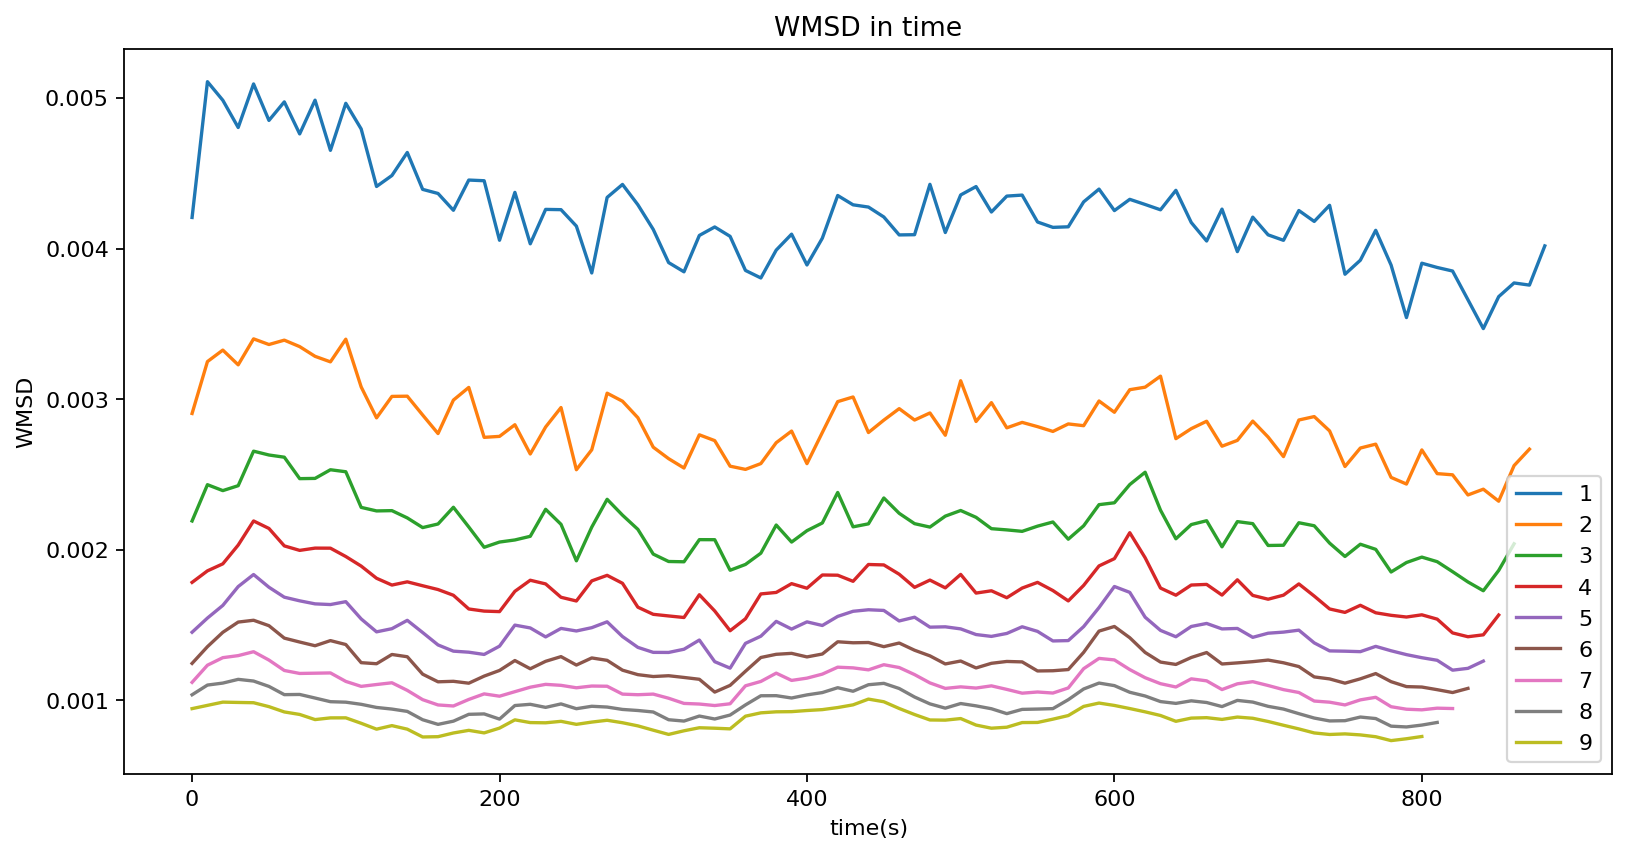

In [92]:
fig=plt.figure(figsize=(12, 6), dpi= 160, facecolor='w', edgecolor='k')
for i,y in enumerate(total_experiment_wmsd):
    times = np.arange(len(y))*10
    plt.plot(times, y, label=str(i+1))
#     print(i+1)
plt.title('WMSD in time')
plt.ylabel('WMSD')# window_size: %s' % w_size)
plt.xlabel('time(s)')
plt.legend()
plt.show();

In [13]:
b_array = np.array([0.00212691, 0.0020256 , 0.00201765, 0.00238816, 0.00209304,
       0.00209162, 0.00220195, 0.00209917, 0.00221636, 0.00209667,
       0.00229901, 0.00203618, 0.00218115, 0.00204188, 0.00205257,
       0.0021726 , 0.00211391, 0.0023712 , 0.00209572, 0.0022653 ,
       0.0022511 , 0.00219281, 0.00205279, 0.00227229, 0.00217028,
       0.00212994, 0.00204898, 0.00200875, 0.00214808, 0.00203183,
       0.00217049, 0.00206947, 0.00194532])

In [30]:
c_array = np.arange(4)

In [59]:
c_array = [0, 1, 2, 3]

In [34]:
d_array = np.append(c_array, np.arange(3), axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [60]:
# Create two 2D Numpy Array like Matrix
matrixArr1 = [[1, 2, 3],[4, 5, 6]]

In [61]:
matrixArr1

[[1, 2, 3], [4, 5, 6]]

In [62]:
xxx = matrixArr1.append(c_array)

In [63]:
print(matrixArr1)

[[1, 2, 3], [4, 5, 6], [0, 1, 2, 3]]


In [46]:
c_array=c_array.reshape(1,4)

In [47]:
newArr = np.append(matrixArr1, c_array , axis=1)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 2 and the array at index 1 has size 1

In [15]:
df = pd.DataFrame()

In [24]:
filePath1 = "/home/luigi/Documents/scripts/test_scripts/results_baseline_single_robot/2020-01-31_robots#1_alpha#1.2_rho#0.3_sim/seed#53_position.tsv"
df_single = pd.read_csv(filePath1, sep="\t")
df = df.append(df_single)

EmptyDataError: No columns to parse from file

In [23]:
df

,Robot id,t = 0,t = 100,t = 200,t = 300,t = 400,t = 500,t = 600,t = 700,t = 800,...,t = 8000,t = 8100,t = 8200,t = 8300,t = 8400,t = 8500,t = 8600,t = 8700,t = 8800,t = 8900
0,0,"0.149,-0.051","0.240,-0.035","0.340,-0.036","0.401,-0.072","0.451,-0.159","0.424,-0.239","0.411,-0.269","0.476,-0.317","0.397,-0.366",...,"-0.226,-1.224","-0.240,-1.125","-0.205,-1.133","-0.236,-1.214","-0.265,-1.304","-0.289,-1.234","-0.262,-1.280","-0.261,-1.182","-0.221,-1.090","-0.172,-1.012"
0,0,"0.149,-0.051","0.240,-0.035","0.340,-0.036","0.401,-0.072","0.451,-0.159","0.424,-0.239","0.411,-0.269","0.476,-0.317","0.397,-0.366",...,"-0.226,-1.224","-0.240,-1.125","-0.205,-1.133","-0.236,-1.214","-0.265,-1.304","-0.289,-1.234","-0.262,-1.280","-0.261,-1.182","-0.221,-1.090","-0.172,-1.012"
0,0,"0.149,-0.051","0.240,-0.035","0.340,-0.036","0.401,-0.072","0.451,-0.159","0.424,-0.239","0.411,-0.269","0.476,-0.317","0.397,-0.366",...,"-0.226,-1.224","-0.240,-1.125","-0.205,-1.133","-0.236,-1.214","-0.265,-1.304","-0.289,-1.234","-0.262,-1.280","-0.261,-1.182","-0.221,-1.090","-0.172,-1.012"
0,0,"0.085,-0.385","0.149,-0.418","0.206,-0.500","0.263,-0.582","0.347,-0.605","0.297,-0.626","0.285,-0.714","0.314,-0.809","0.343,-0.905",...,"0.722,-1.120","0.701,-1.171","0.730,-1.214","0.667,-1.148","0.707,-1.056","0.747,-0.965","0.788,-0.873","0.828,-0.781","0.868,-0.690","0.909,-0.598"


In [462]:

# folder = "/home/luigi/Documents/scripts/test_scripts/py3_scripts"
# fileName = folder+"/sample_position.tsv"
fileName = "/home/luigi/Documents/scripts/test_scripts/py3_scripts/example_out/2020-01-16_robots#50_alpha#1.2_rho#0.9_sim/seed#1_position.tsv"

window_size = 1

df = pd.read_csv(fileName, sep="\t")
df_values = df.values[:,1:]
print(df_values[:3,:2])

[['0.224,0.123' '0.242,0.028']
 ['-0.015,-0.012' '-0.018,0.086']
 ['-0.091,-0.412' '-0.004,-0.455']]


# Split delle stringhe di punti!

In [435]:
boh = np.array([x.split(',') for x in df_values.ravel()],dtype=float)
[num_robot, num_times] = df_values.shape
boh = boh.reshape(num_robot,num_times,2)
# print(boh)

In [428]:
# boh     #5 robot   #4 tempi 

In [477]:
tx = boh[:3,0]
ty = boh[:3,1]
try_vec = (ty-tx)**2
print(try_vec)
temp = np.sum(try_vec, axis=1)
print(temp)

[[3.240e-04 9.025e-03]
 [9.000e-06 9.604e-03]
 [7.569e-03 1.849e-03]]
[0.009349 0.009613 0.009418]


In [483]:
w = 1
w_displacement_matrix = np.array([])

for f in range(w, num_times, w):
    tf = boh[:,f]
    ti = boh[:,f-w]
    sq_distance = np.sum((tf-ti)**2, axis=1)
    wmsd = np.true_divide(sq_distance, w**2)
    w_displacement_matrix = np.column_stack([w_displacement_matrix, wmsd]) if w_displacement_matrix.size else wmsd
#     print(f-w, f)
    
avg_robot_wmsd = np.mean(w_displacement_matrix, axis=0)
avg_msd = np.mean(avg_robot_wmsd)

In [484]:
avg_robot_wmsd.shape
# print(w_displacement_matrix.size)

(89,)

In [485]:
avg_msd = np.mean(avg_robot_wmsd)

In [486]:
avg_msd

0.003430623146067416

In [452]:
df_values.shape

(50, 90)

In [450]:
single_experiments = window_displacement(df_values, 1)

In [451]:
single_experiments.shape

(89,)

In [456]:
bla = np.mean(single_experiments)

In [457]:
bla

0.003430623146067416

In [408]:
tf = boh[:,2]
ti = boh[:,1]

In [409]:
tf

array([[ 0.289,  0.242],
       [-0.18 , -0.001],
       [-0.18 , -0.401],
       [-0.24 ,  0.084],
       [ 0.039, -0.446]])

In [410]:
# ti

In [411]:
sq_sum = (tf-ti)**2
sq_distance = sq_sum[:,0] + sq_sum[:,1]
wmsd = np.true_divide(sq_distance, w**2)

In [412]:
# wmsd

In [415]:
w_displacement_matrix = np.column_stack([w_displacement_matrix, wmsd]) if w_displacement_matrix.size else wmsd

In [416]:
w_displacement_matrix

array([[0.001354, 0.010064, 0.010064],
       [0.005402, 0.0089  , 0.0089  ],
       [0.00157 , 0.01    , 0.01    ],
       [0.005125, 0.003365, 0.003365],
       [0.003285, 0.004165, 0.004165]])

In [ ]:
w_displacement_matrix = np.zeros((pos_concatenated.shape[0], expe_length))
w_displacement_array = np.mean(w_displacement_matrix, axis=0)
return(w_displacement_array)

In [ ]:
# w = 1
# wmsd = np.zeros(2)
# for f in range(w, boh.shape[1], w):
#     tf = boh[:,f]
#     ti = boh[:,f-w]
#     sq_sum = (tf-ti)**2
#     sq_distance = sq_sum[:,0] + sq_sum[:,1]
#     wmsd += np.true_divide(sq_distance, w**2)
#     print(f-w, f)

In [164]:
r1 = boh[0,:]
r2 = boh[1,:]
r3 = boh[2,:]

In [165]:
#input path =[ [x1,y1], ... ,[xn,yn] ].

def compute_MSD(path):
    totalsize=len(path)
#     print(len(path))
    msd=[]
    for i in range(totalsize-1):
        j=i+1
#         print(path[0:-j], "\n\n", path[j::] )
        msd.append(np.sum((path[0:-j]-path[j::])**2)/float(totalsize-j))
#         print('\n')
    msd=np.array(msd)
    return msd

In [166]:
msd1 = compute_MSD(r1)

In [167]:
r1

array([[0.224, 0.123],
       [0.249, 0.15 ],
       [0.289, 0.242],
       [0.322, 0.314]])

In [ ]:
def fixed_window_displacement(df, window_size):
    w_displacement_matrix = np.array([])
    
    for f in range(window_size, df.shape[1], window_size):
        tf = df[:,f]
        ti = df[:,f-window_size]
        sq_distance = np.sum((tf-ti)**2, axis=1)
        wmsd = np.true_divide(sq_distance, window_size**2)
        w_displacement_matrix = np.column_stack([w_displacement_matrix, wmsd]) if w_displacement_matrix.size else wmsd
    #     print(f-w, f)

    w_displacement_array = np.mean(w_displacement_matrix, axis=0)
    return(w_displacement_array)
#     wmsd = np.mean(w_displacement_array)

In [47]:
fileName = "/home/luigi/Documents/scripts/test_scripts/py3_scripts/example_out/2020-01-16_robots#50_alpha#1.2_rho#0.9_sim/seed#1_position.tsv"

window_size = 1

df = pd.read_csv(fileName, sep="\t")
df_values = df.values[:,1:]
print(df_values[:3,:2])

[['0.224,0.123' '0.242,0.028']
 ['-0.015,-0.012' '-0.018,0.086']
 ['-0.091,-0.412' '-0.004,-0.455']]


In [48]:
[num_robot, num_times] = df_values.shape
df_values = np.array([x.split(',') for x in df_values.ravel()],dtype=float)
df_values = df_values.reshape(num_robot,num_times,2)
# print(boh)

In [50]:
avg_msd = np.mean(w_displacement_array)

In [51]:
avg_msd

0.003430623146067416